In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

# 1. The law of large numbers



1.   The program first rolls the dice a specified number of times (sample size).
2.   It then calculates the average value of the roll results.  
3.   This process is repeated for different sample sizes.  





In [ ]:
import random

def roll_dice():
    # Simulate rolling a dice (selecting a random number from 1 to 6)
    return random.randint(1, 6)

def average_of_rolls(n):
    # n - number of dice rolls
    sum_of_results = sum(roll_dice() for _ in range(n))
    return sum_of_results / n

# Conduct a series of experiments with different sample sizes
sample_sizes = [5, 50, 100, 500, 10000]

for sample_size in sample_sizes:
    average_value = average_of_rolls(sample_size)
    print(f"Sample Size: {sample_size}, Average Value: {average_value}")


Sample Size: 5, Average Value: 2.4
Sample Size: 50, Average Value: 3.52
Sample Size: 100, Average Value: 3.6
Sample Size: 500, Average Value: 3.496
Sample Size: 10000, Average Value: 3.5162


In [ ]:
np.random.randint(1,7)

3

In [ ]:
dice = pd.Series([1,2,3,4,5,6])

In [ ]:
dice.mean()

3.5

In [ ]:
np.mean(np.random.randint(1,7,size=10000))

3.519

In [ ]:
dice.sample(10000,replace=True).mean()

3.4726

In [ ]:
result = [dice.sample(n,replace=True).mean() for n in range(1,1000)]

In [ ]:
result[:10]

[3.0,
 1.5,
 2.6666666666666665,
 4.5,
 4.4,
 4.333333333333333,
 5.0,
 3.5,
 4.444444444444445,
 3.4]

<Axes: >

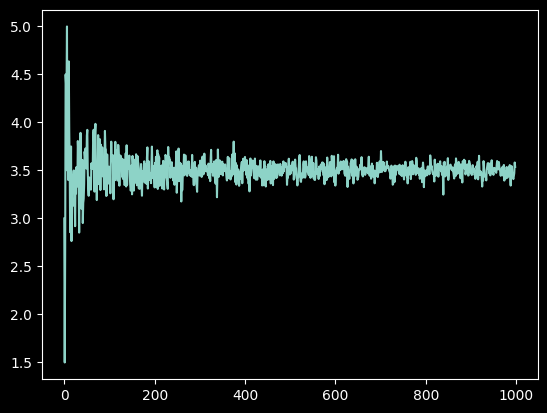

In [ ]:
pd.Series(result).plot()

<Axes: xlabel='sample_size'>

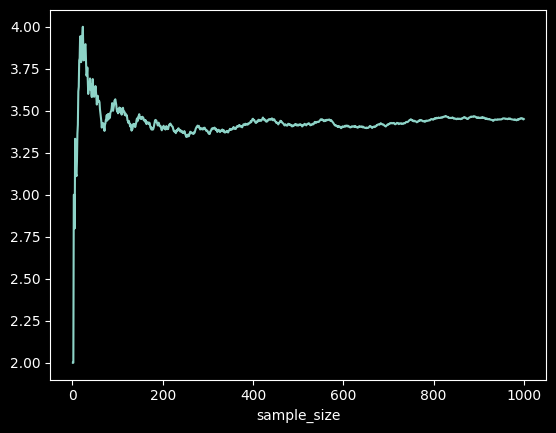

In [ ]:
t = pd.DataFrame(np.random.randint(1,7,size=1000),columns=['mean'])
t['cumsum'] = t['mean'].cumsum()
t['sample_size'] = t.index.values + 1
t['cummean'] = t['cumsum'] / t['sample_size']
t.set_index('sample_size')['cummean'].plot()

<Axes: >

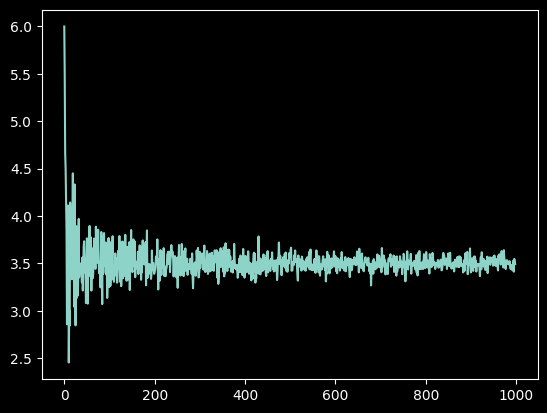

In [ ]:
pd.Series([np.mean(np.random.randint(1,7,size=n)) for n in range(1,1000)]).plot()

## 1.1 Normal distribution

In [ ]:
np.random.normal(size=10)

array([ 2.59833991, -0.14456574, -0.06103722, -0.68965314, -0.50904999,
        0.06168203, -1.50022215,  1.52931868,  1.16816156,  0.65308094])

<Axes: xlabel='sample_size'>

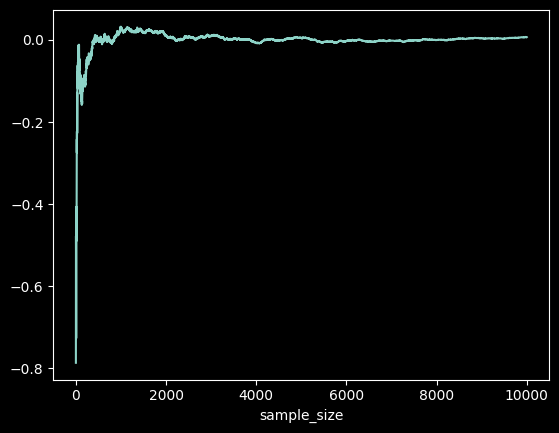

In [ ]:
t = pd.DataFrame(np.random.normal(size=10000),columns=['mean'])
t['cumsum'] = t['mean'].cumsum()
t['sample_size'] = t.index.values + 1
t['cummean'] = t['cumsum'] / t['sample_size']
t.set_index('sample_size')['cummean'].plot()

## 1.2 Uniform distribution

<Axes: xlabel='sample_size'>

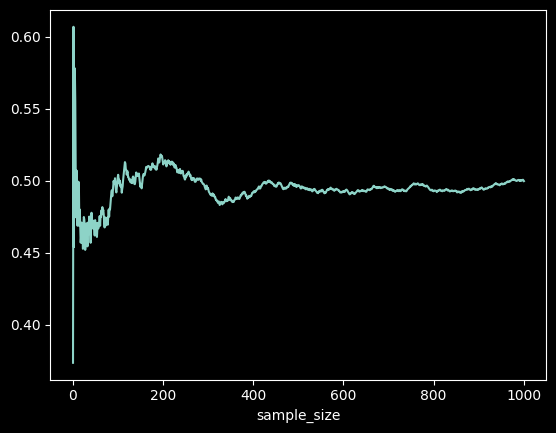

In [ ]:
t = pd.DataFrame(np.random.uniform(size=1000),columns=['mean'])
t['cumsum'] = t['mean'].cumsum()
t['sample_size'] = t.index.values + 1
t['cummean'] = t['cumsum'] / t['sample_size']
t.set_index('sample_size')['cummean'].plot()

## 1.3 Lognormal distribution

In [ ]:
t = np.random.lognormal(size=1000)

<Axes: ylabel='Count'>

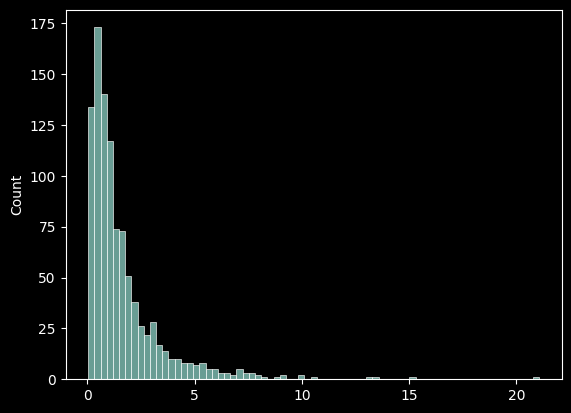

In [ ]:
sns.histplot(t)

In [ ]:
t.mean()

1.6177197603198719

<Axes: xlabel='sample_size'>

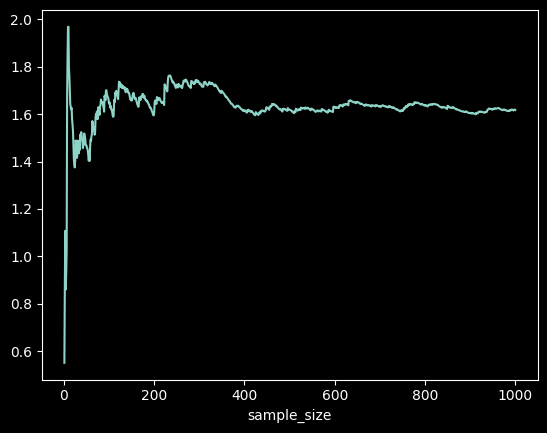

In [ ]:
t = pd.DataFrame(t,columns=['mean'])
t['cumsum'] = t['mean'].cumsum()
t['sample_size'] = t.index.values + 1
t['cummean'] = t['cumsum'] / t['sample_size']
t.set_index('sample_size')['cummean'].plot()

# 2. Central Limit Theorem

<Axes: ylabel='Count'>

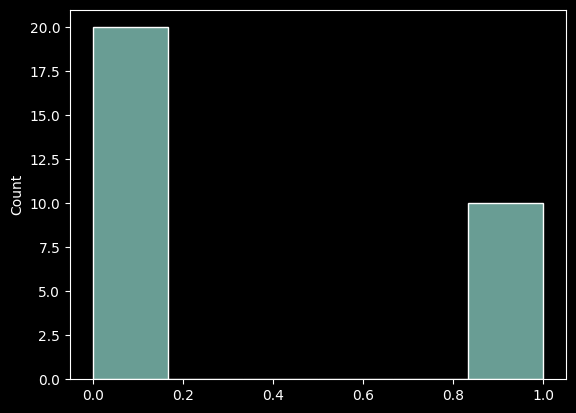

In [ ]:
sns.histplot(np.random.choice([0, 1],size=30))

<Axes: ylabel='Count'>

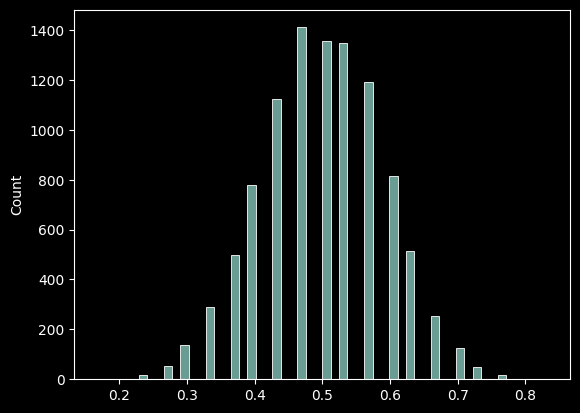

In [ ]:
sns.histplot([np.mean(np.random.choice([0, 1],size=30)) for _ in range(10000)])

 В этом примере мы симулируем броски монеты (0 - решка, 1 - орел) и вычисляем среднее значение из каждой выборки. Затем строим гистограмму этих средних значений. Вы увидите, что по мере увеличения числа выборок гистограмма средних значений становится все больше похожей на нормальное распределение, что является проявлением Центральной Предельной Теоремы.

<Axes: ylabel='Count'>

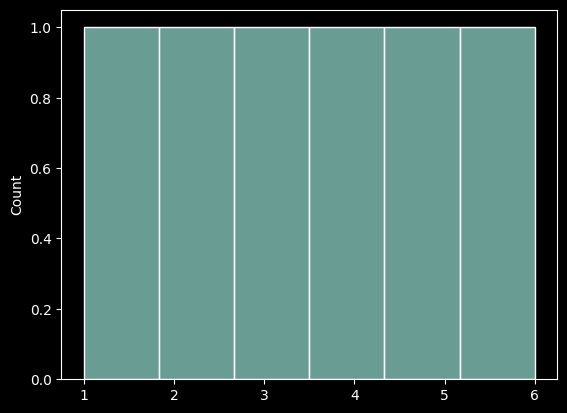

In [ ]:
sns.histplot(dice,bins=6)

Распределение равномерное

In [ ]:
data = [np.mean(np.random.randint(1,7,size=1)) for _ in range(10000)]

<Axes: ylabel='Count'>

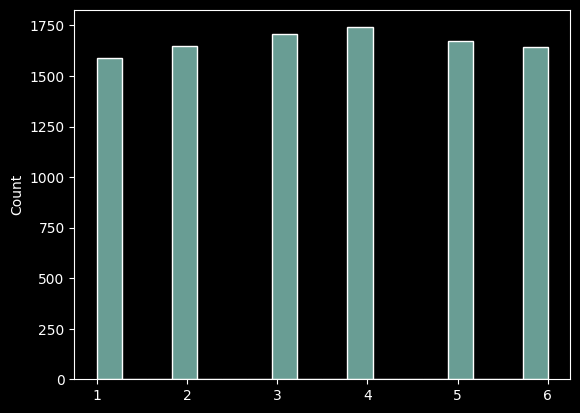

In [ ]:
sns.histplot(data)

Не смотря на то, что распределение равномерное, среднее распределено нормально

In [ ]:
data = [np.mean(np.random.randint(1,7,size=1000)) for _ in range(10000)]

<Axes: ylabel='Count'>

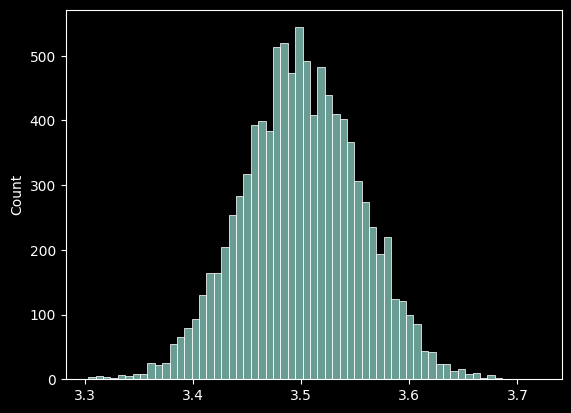

In [ ]:
sns.histplot(data)